<a href="https://colab.research.google.com/github/GangaMegha/Digital-Image-Processsing/blob/main/DL_Lab_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE 637 Deep Learning Lab Exercises


Name: Ganga Meghanath

Uploaded to : https://github.com/GangaMegha/Digital-Image-Processsing/blob/main/DL_Lab_Exercises.ipynb

# Section 1

## Exercise 1.1

1.   Create two lists, `A` and `B`: `A` contains 3 arbitrary numbers and `B` contains 3 arbitrary strings.
2.   Concatenate two lists into a bigger list and name that list `C`. 
3.   Print the first element in `C`.
4.   Print the second last element in `C` via negative indexing.
5.   Remove the second element of `A` from `C`.
6.   Print `C` again.

In [1]:
#  ----------- YOUR CODE -----------
A = [2, 3, 5]
B = ["Ganga", "Acha", "Amma"]

C = A + B

print(C)

print(C[0])
print(C[-2])

C.remove(A[1])
print(C)

[2, 3, 5, 'Ganga', 'Acha', 'Amma']
2
Acha
[2, 5, 'Ganga', 'Acha', 'Amma']


## Exercise 1.2
In this exercise, you will use a low-pass IIR filter to remove noise from a sine-wave signal.

You should organize your plots in a 3x1 subplot format.

1. Generate a discrete-time signal, `x`, by sampling a 2Hz continuous time sine wave signal with peak amplitude 1 from time 0s to 10s and at a sampling frequency of 500 Hz. Display the signal, `x`, from time 4s to 6s in the first row of a 3x1 subplot with the title "original signal".

2. Add Gaussian white random noise with 0 mean and standard deviation  0.1 to `x` and call it `x_n` . Display `x_n` from 4s to 6s on the second row of the subplot with the title "input signal".

3. Design a low-pass butterworth IIR filter of order 5 with a cut-off frequency of 4Hz, designed to filter out the noise.  Hint: Use the [signal.butter](https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.signal.butter.html#scipy.signal.butter) function and note that the frequencies are relative to the Nyquist frequency. Apply the IIR filter to `x_n`, and name the output `y`. Hint: Use [signal.filtfilt](https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.signal.filtfilt.html#scipy.signal.filtfilt) function. Plot `y` from 4s to 6s on the third row of the subplot with the title "filtered signal".


<Figure size 720x1080 with 0 Axes>

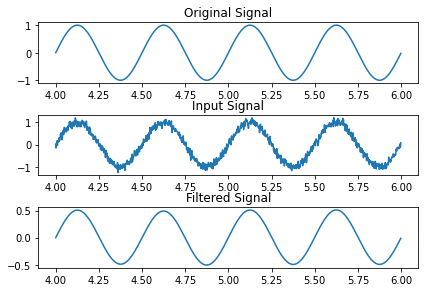

In [2]:
import numpy as np                     # import the numpy packages and use a shorter alising name
import matplotlib.pyplot as plt        # again import the matplotlib's pyplot packages
from scipy import signal               # import a minor package signal from scipy
plt.figure(figsize=(10, 15))           # fix the plot size

#  ----------- YOUR CODE -----------
fig, ax = plt.subplots(3)
fig.tight_layout()

# Qn. 1
sf = 500
t = np.arange(0, 10, step=1/sf)

f=2
x = np.sin(2*np.pi*f*t)

ax[0].plot(t[4*500:6*500], x[4*500:6*500])
ax[0].title.set_text('Original Signal')

# Qn. 2
gauss_noise = np.random.normal(0, 0.1, t.shape)
x_n = x + gauss_noise

ax[1].plot(t[4*500:6*500], x_n[4*500:6*500])
ax[1].title.set_text('Input Signal')


# Qn. 3
b, a = signal.butter(5, 4/500, 'low')
y = signal.filtfilt(b, a, x_n)

ax[2].plot(t[4*500:6*500], y[4*500:6*500])
ax[2].title.set_text('Filtered Signal')


plt.show()

# Section 2

## Exercise 2.1

*   Plot the third image in the test data set
*   Find the correspoding label for the this image and make it the title of the figure


11501568/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, 'Image of 1')

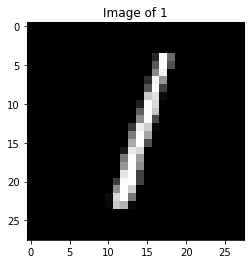

In [3]:
import keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

#  ----------- YOUR CODE -----------
plt.imshow(test_images[2].reshape((28, 28)), "gray")
plt.title("Image of {}".format(test_labels[2]))

## Exercise 2.2
It is usually helpful to have an accuracy plot as well as a loss value plot to get an intuitive sense of how effectively the model is being trained. 

* Add code to this example for plotting two graphs with the following requirements:
  - Use a 1x2 subplot with the left subplot showing the loss function and right subplot showing the accuracy.
  - For each graph, plot the value with respect to epochs. Clearly label the x-axis, y-axis and the title.

(Hint: The value of of loss and accuracy are stored in the `hist` variable. 
Try to print out `hist.history` and `his.history.keys()`.)

In [4]:
import keras
from keras.datasets import mnist
from keras import models
from keras import layers
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

network = models.Sequential()
network.add(layers.Flatten(input_shape=(28, 28, 1)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

train_images_nor = train_images.astype('float32') / 255
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

hist = network.fit(train_images_nor, train_labels_cat, epochs=5, batch_size=128)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 10s 17ms/step - loss: 0.2535 - accuracy: 0.9265
Epoch 2/5
469/469 [==============================] - 6s 14ms/step - loss: 0.1032 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0670 - accuracy: 0.9800
Epoch 4/5
469

In [5]:
hist.history, hist.history.keys(), hist.params

({'accuracy': [0.9265000224113464,
   0.9693666696548462,
   0.9799500107765198,
   0.9850000143051147,
   0.9890999794006348],
  'loss': [0.25352272391319275,
   0.10322625190019608,
   0.0670025646686554,
   0.049393631517887115,
   0.03672918304800987]},
 dict_keys(['loss', 'accuracy']),
 {'epochs': 5, 'steps': 469, 'verbose': 1})

In [6]:
np.arange(hist.params["epochs"]), hist.history["loss"]

(array([0, 1, 2, 3, 4]),
 [0.25352272391319275,
  0.10322625190019608,
  0.0670025646686554,
  0.049393631517887115,
  0.03672918304800987])

<Figure size 720x288 with 0 Axes>

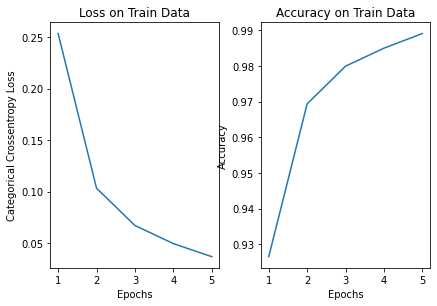

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 4))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()

ax[0].plot(np.arange(1, hist.params["epochs"]+1), hist.history["loss"])
ax[0].set_title("Loss on Train Data")
ax[0].set_ylabel("Categorical Crossentropy Loss")
ax[0].set_xlabel("Epochs")

ax[1].plot(np.arange(1, hist.params["epochs"]+1), hist.history["accuracy"])
ax[1].set_title("Accuracy on Train Data")
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epochs")

#  ----------- YOUR CODE -----------

plt.show()

In [8]:
test_loss, test_acc = network.evaluate(test_images_nor, test_labels_cat)
print('test_accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0710 - accuracy: 0.9789
test_accuracy: 0.9789000153541565


## Exercise 2.3
Use the dense network from Section 2 as the basis to construct of a deeper network with

*  5 dense hidden layers with dimensions [512, 256, 128, 64, 32] each of which uses a ReLU non-linearity

**Question:** Will the accuracy on the testing data always get better if we keep making the neural network larger?



NO. As we make the network larger, we are also making it more complex. So our network is more prone to overfitting on the dataset and hence, even if accuracy on training data increases, accuracy on test data will reduce after a point. We can also understand this based on bias-variance trade-off. As we decrease the bias in the model, variance will be higher. Hence larger models are more prone to overfitting.

In [9]:
import keras
from keras import models
from keras import layers

#  ----------- YOUR CODE -----------
network = models.Sequential()
network.add(layers.Flatten(input_shape=(28, 28, 1)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)               

In [10]:
import keras
from keras.datasets import mnist
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

train_images_nor = train_images.astype('float32') / 255
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

hist = network.fit(train_images_nor, train_labels_cat, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images_nor, test_labels_cat)
print('test_accuracy:', test_acc)

Epoch 1/5
469/469 [==============================] - 8s 15ms/step - loss: 0.2919 - accuracy: 0.9106
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.1011 - accuracy: 0.9707
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0702 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0509 - accuracy: 0.9850
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1027 - accuracy: 0.9759
test_accuracy: 0.9758999943733215


<Figure size 720x288 with 0 Axes>

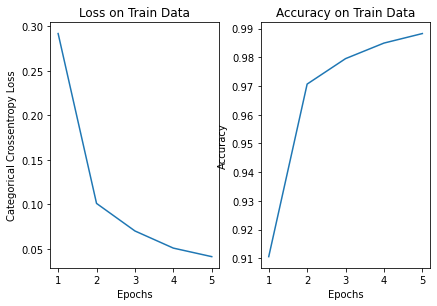

In [11]:
import matplotlib.pyplot as plt
import numpy as np

#  ----------- YOUR CODE -----------

plt.figure(figsize=(10, 4))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()

ax[0].plot(np.arange(1, hist.params["epochs"]+1), hist.history["loss"])
ax[0].set_title("Loss on Train Data")
ax[0].set_ylabel("Categorical Crossentropy Loss")
ax[0].set_xlabel("Epochs")

ax[1].plot(np.arange(1, hist.params["epochs"]+1), hist.history["accuracy"])
ax[1].set_title("Accuracy on Train Data")
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epochs")

plt.show()

# Section 3

## Exercise 3.1
In this exercise, you will access the relationship between the feature extraction layer and classification layer. The example above uses two sets of convolutional layers and pooling layers in the feature extraction layer and two dense layers in the classification layers. The overall performance is around 98% for both training and test dataset. In this exercise, try to create a similar CNN network with the following requirements:

*   Achieve the overall accuracy higher than 99% for training and testing dataset.
*  Keep the total number of parameters used in the network lower than 100,000.

In [12]:
import keras
from keras import models
from keras import layers

network = models.Sequential()

#  ----------- YOUR CODE -----------
# First Layer
network.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
network.add(layers.MaxPooling2D((2, 2)))
# Second Layer
network.add(layers.Conv2D(32, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

# ---- Classification section
# Rearrange the data
network.add(layers.Flatten())
# Third Layer
network.add(layers.Dense(110, activation='relu'))
# Fourth Layer
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (None, 110)              

In [13]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images_nor = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
hist = network.fit(train_images_nor, train_labels_cat, epochs=15, batch_size=128)

test_loss, test_acc = network.evaluate(test_images_nor, test_labels_cat)
print('test_accuracy:', test_acc)

Epoch 1/15
469/469 [==============================] - 27s 56ms/step - loss: 0.2444 - accuracy: 0.9250
Epoch 2/15
469/469 [==============================] - 27s 57ms/step - loss: 0.0671 - accuracy: 0.9791
Epoch 3/15
469/469 [==============================] - 26s 55ms/step - loss: 0.0469 - accuracy: 0.9853
Epoch 4/15
469/469 [==============================] - 26s 55ms/step - loss: 0.0360 - accuracy: 0.9886
Epoch 5/15
469/469 [==============================] - 26s 56ms/step - loss: 0.0283 - accuracy: 0.9911
Epoch 6/15
469/469 [==============================] - 26s 56ms/step - loss: 0.0232 - accuracy: 0.9924
Epoch 7/15
469/469 [==============================] - 26s 55ms/step - loss: 0.0189 - accuracy: 0.9941
Epoch 8/15
469/469 [==============================] - 26s 54ms/step - loss: 0.0155 - accuracy: 0.9949
Epoch 9/15
469/469 [==============================] - 26s 55ms/step - loss: 0.0130 - accuracy: 0.9959
Epoch 10/15
469/469 [==============================] - 26s 54ms/step - loss: 0.011

<Figure size 720x288 with 0 Axes>

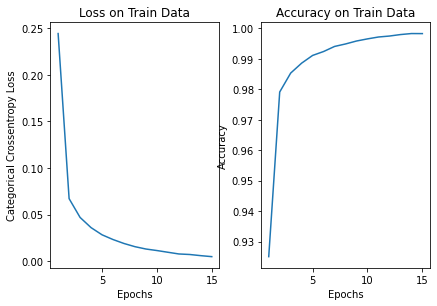

In [14]:
import matplotlib.pyplot as plt
import numpy as np

#  ----------- YOUR CODE -----------

plt.figure(figsize=(10, 4))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()

ax[0].plot(np.arange(1, hist.params["epochs"]+1), hist.history["loss"])
ax[0].set_title("Loss on Train Data")
ax[0].set_ylabel("Categorical Crossentropy Loss")
ax[0].set_xlabel("Epochs")

ax[1].plot(np.arange(1, hist.params["epochs"]+1), hist.history["accuracy"])
ax[1].set_title("Accuracy on Train Data")
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epochs")

plt.show()

# Section 4

## Exercise 4.1
In this exercise you will need to create the entire neural network that does image denoising tasks. Try to mimic the code provided above and follow the structure as provided in the instructions below.

**Task 1**: Create the datasets
1.   Import necessary packages
2.   Load the MNIST data from Keras, and save the training dataset images as `train_images`, save the test dataset images as `test_images`
3.   Add additive white gaussian noise to the train images as well as the test images and save the noisy images to `train_images_noisy` and `test_images_noisy` respectivly. The noise should have mean value 0, and standard deviation 0.4. (Hint: Use [np.random.normal](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html))
4.   Show the first image in the training dataset as well as the test dataset (plot the images in 1 x 2 subplot form)

<Figure size 720x288 with 0 Axes>

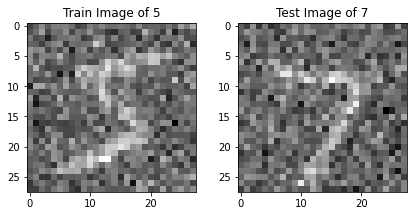

In [15]:
#  ----------- YOUR CODE -----------

# Read Images
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images_nor = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

# Get Gaussian Noise
mu, sigma = 0, 0.4 # mean and standard deviation
train_images_noisy = train_images_nor + np.random.normal(mu, sigma, train_images_nor.shape[0]*train_images_nor.shape[1]*train_images_nor.shape[2]).reshape(train_images_nor.shape)
test_images_noisy = test_images_nor + np.random.normal(mu, sigma, test_images_nor.shape[0]*test_images_nor.shape[1]*test_images_nor.shape[2]).reshape(test_images_nor.shape)

# Display the image
plt.figure(figsize=(10, 4))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()

ax[0].imshow(train_images_noisy[0].reshape((28, 28)), "gray")
ax[0].set_title("Train Image of {}".format(train_labels[0]))

ax[1].imshow(test_images_noisy[0].reshape((28, 28)), "gray")
ax[1].set_title("Test Image of {}".format(test_labels[0]))

plt.show()

<Figure size 720x288 with 0 Axes>

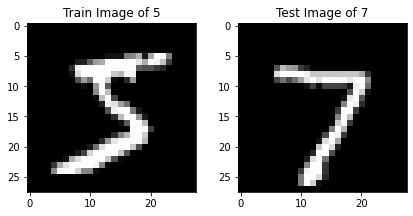

In [21]:
# Display the original images
plt.figure(figsize=(10, 4))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()

ax[0].imshow(train_images[0].reshape((28, 28)), "gray")
ax[0].set_title("Train Image of {}".format(train_labels[0]))

ax[1].imshow(test_images[0].reshape((28, 28)), "gray")
ax[1].set_title("Test Image of {}".format(test_labels[0]))

plt.show()

**Task 2**: Create the neural network model
1.   Create a sequential model called `encoder` with the following layers sequentially:
  * convolutional layer with `32` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * max pooling layer with `2x2` kernel size
  * convolutional layer with `16` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * max pooling layer with `2x2` kernel size
  * convolutional layer with `8` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function and name the layer as `'convOutput'`.
  * flatten layer
  * dense layer with output dimension as `encoding_dim`  with `'relu'` activition function.
2.   Create a sequential model called `decoder` with the following layers sequentially:
  * dense layer with the input dimension as `encoding_dim` and the output dimension as the product of the output dimenstions of the `'convOutput'` layer.
  * reshape layer that convert the tensor into the same shape as `'convOutput'`
  * convolutional layer with `8` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * upsampling layer with `2x2` kernel size
  * convolutional layer with `16` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function.
  * upsampling layer with `2x2` kernel size
  * convolutional layer with `32` output channels, `3x3` kernel size, and the padding convention `'same'` with `'relu'` activition function
  * convolutional layer with `1` output channels, `3x3` kernel size, and the padding convention `'same'` with `'sigmoid'` activition function
3. Create a sequential model called `autoencoder` with the following layers sequentially:
  * `encoder` model
  * `decoder` model
 

In [16]:
#  ----------- YOUR CODE -----------
encoding_dim = 32

# Build Encoder
encoder = models.Sequential()
encoder.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=train_images.shape[1:]))
encoder.add(layers.MaxPooling2D((2, 2),                  padding='same'))
encoder.add(layers.Conv2D(16, (3, 3),  activation='relu', padding='same'))
encoder.add(layers.MaxPooling2D((2, 2),                  padding='same'))
encoder.add(layers.Conv2D(8, (3, 3),  activation='relu', padding='same', name='convOutput'))

encoder.add(layers.Flatten())
encoder.add(layers.Dense(encoding_dim, activation='relu'))


# shape considerations
convShape = encoder.get_layer('convOutput').output_shape[1:]
denseShape = convShape[0]*convShape[1]*convShape[2]


# Build Decoder
decoder = models.Sequential()
decoder.add(layers.Dense(denseShape, input_shape=(encoding_dim,)))
decoder.add(layers.Reshape(convShape))

decoder.add(layers.Conv2D(8, (3, 3),  activation='relu',    padding='same'))
decoder.add(layers.UpSampling2D((2, 2)))
decoder.add(layers.Conv2D(16, (3, 3),  activation='relu',    padding='same'))
decoder.add(layers.UpSampling2D((2, 2)))
decoder.add(layers.Conv2D(32, (3, 3), activation='relu',    padding='same'))
decoder.add(layers.Conv2D(1, (3, 3),  activation='sigmoid', padding='same'))

# Build Autoencoder
autoencoder = models.Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

Then we build the autoencoder by putting the encoder and decoder together, and we print out the resulting model.

In [17]:
encoder.summary()
decoder.summary()
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 convOutput (Conv2D)         (None, 7, 7, 8)           1160      
                                                                 
 flatten_3 (Flatten)         (None, 392)              

**Task 3**: Create the neural network model  

Fit the model to the training data using the following hyper-parameters:
  * `adam` optimizer
  * `binary_crossentropy` loss function
  * `20` training epochs
  * batch size as `256`
  * set `shuffle` as `True`
  
Compile the model and fit ...

In [18]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(train_images_noisy, train_images_nor, 
                epochs=20, 
                batch_size=256,
                shuffle=True)

Epoch 1/20
235/235 [==============================] - 161s 681ms/step - loss: 0.2705
Epoch 2/20
235/235 [==============================] - 157s 668ms/step - loss: 0.1522
Epoch 3/20
235/235 [==============================] - 166s 707ms/step - loss: 0.1308
Epoch 4/20
235/235 [==============================] - 157s 667ms/step - loss: 0.1221
Epoch 5/20
235/235 [==============================] - 157s 670ms/step - loss: 0.1171
Epoch 6/20
235/235 [==============================] - 157s 669ms/step - loss: 0.1141
Epoch 7/20
235/235 [==============================] - 156s 665ms/step - loss: 0.1118
Epoch 8/20
235/235 [==============================] - 155s 659ms/step - loss: 0.1101
Epoch 9/20
235/235 [==============================] - 155s 658ms/step - loss: 0.1083
Epoch 10/20
235/235 [==============================] - 154s 655ms/step - loss: 0.1069
Epoch 11/20
235/235 [==============================] - 154s 656ms/step - loss: 0.1059
Epoch 12/20
235/235 [==============================] - 154s 656

**Task 4**: Create the neural network model (No need to write code, just run the following commands)

In [19]:
def showImages(input_imgs, encoded_imgs, output_imgs, size=1.5, groundTruth=None):

  numCols = 3 if groundTruth is None else 4
  
  num_images = input_imgs.shape[0]
      
  encoded_imgs = encoded_imgs.reshape((num_images, 1, -1))
    

  plt.figure(figsize=((numCols+encoded_imgs.shape[2]/input_imgs.shape[2])*size, num_images*size))

  pltIdx = 0
  col = 0
  for i in range(0, num_images):

    col += 1
    # plot input image
    pltIdx += 1
    ax = plt.subplot(num_images, numCols, pltIdx)
    plt.imshow(input_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if col == 1:
      plt.title('Input Image')

    # plot encoding
    pltIdx += 1
    ax = plt.subplot(num_images, numCols, pltIdx)
    plt.imshow(encoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if col == 1:
      plt.title('Encoded Image')

    # plot reconstructed image
    pltIdx += 1
    ax = plt.subplot(num_images, numCols, pltIdx)
    plt.imshow(output_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if col == 1:
      plt.title('Reconstructed Image')
  
    if numCols == 4:
      # plot ground truth image
      pltIdx += 1
      ax = plt.subplot(num_images, numCols, pltIdx)
      plt.imshow(groundTruth[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      
      if col == 1:
        plt.title('Ground Truth')

  plt.show()

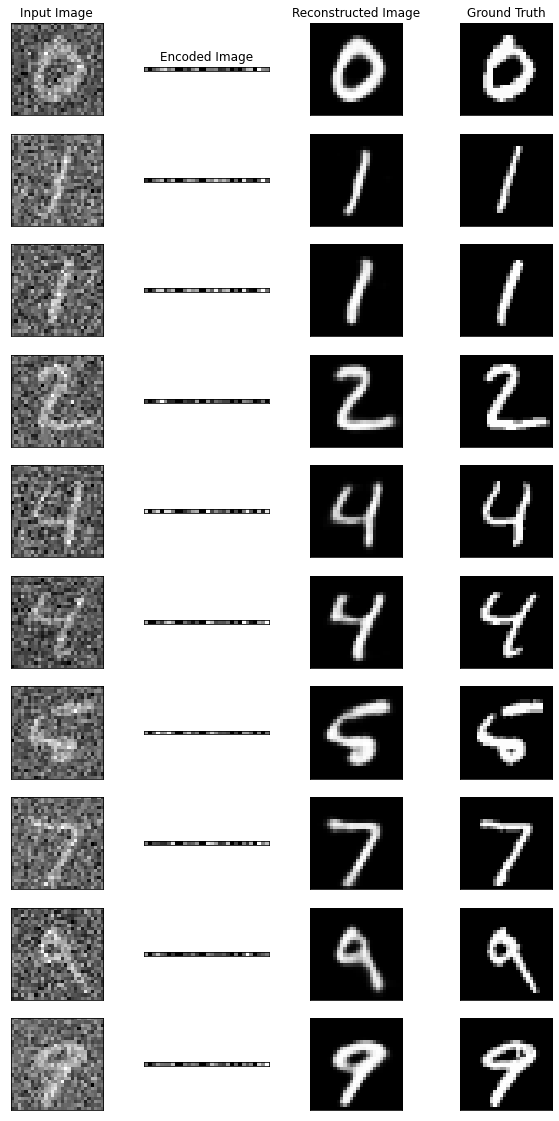

In [20]:
num_images = 10

input_labels = test_labels[0:num_images]
I = np.argsort(input_labels)

input_imgs = test_images_noisy[I]

encoded_imgs = encoder.predict(test_images_noisy[I])
output_imgs = decoder.predict(encoded_imgs)

showImages(input_imgs, encoded_imgs, output_imgs, size=2, groundTruth=test_images_nor[I])